In [2]:
# final project

# Kaggle challenge first delivery

## Sources

<li>https://www.kaggle.com/spencerpitts/european-hotel-reviews-r</li>
<li>https://www.kaggle.com/gunnvant/what-do-reviews-say</li>
<li>https://www.kaggle.com/code/sampsonsimpson/map-of-hotels-rmd/report</li>
<li>https://www.kaggle.com/code/sampsonsimpson/exploring-515k-european-hotel-reviews/report</li>

## Librairies

In [84]:
#Installer les librairies (Utile seulement la première fois !)
install.packages("devtools")
install.packages("RColorBrewer")
devtools::install_github("hadley/tidyverse")
install.packages("tidytext")
install.packages("viridis")

#Charger les librairies
library("viridis")           
library(RColorBrewer)
library(tidyverse)
library(lubridate)
library(stringr)
library(forcats)
library(tidytext)
library(sqldf)
library(plotly)
library(leaflet)
library(leaflet.extras)
library(ggplot2)
library(wordcloud2)
library(tm)
install.packages("performance")


library(dplyr)
library(tidyr)
library(leaflet)
library(leaflet.extras)
library(grid)
library(gridExtra)
library(scales)
library(knitr)
library(dplyr)
library(ggplot2)
library(readr)
library(stringr)
library(broom)
library(tidytext)
library(tidyr)
library(leaflet)
library(gridExtra)
library(performance)

Installation du package dans 'C:/Users/user/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpmURN74\downloaded_packages


Warning message:
"le package 'RColorBrewer' est en cours d'utilisation et ne sera pas installé"

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

Skipping install of 'tidyverse' from a github remote, the SHA1 (6186fbf0) has not changed since last install.
  Use `force = TRUE` to force installation

Warning message:
"le package 'tidytext' est en cours d'utilisation et ne sera pas installé"
Warning message:
"le package 'viridis' est en cours d'utilisation et ne sera pas installé"
Installation du package dans 'C:/Users/user/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'performance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpmURN74\downloaded_packages


Warning message:
"le package 'performance' a été compilé avec la version R 4.1.3"


In [33]:
dataset = read_csv("Hotel_Reviews.csv")
spec(dataset)

# check for if any null values are present in which columns
sapply(dataset, function(x)sum(is.na(x)))


Rows: 515738 Columns: 17
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (8): Hotel_Address, Review_Date, Hotel_Name, Reviewer_Nationality, Negat...
dbl (9): Additional_Number_of_Scoring, Average_Score, Review_Total_Negative_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  Hotel_Address = col_character(),
  Additional_Number_of_Scoring = col_double(),
  Review_Date = col_character(),
  Average_Score = col_double(),
  Hotel_Name = col_character(),
  Reviewer_Nationality = col_character(),
  Negative_Review = col_character(),
  Review_Total_Negative_Word_Counts = col_double(),
  Total_Number_of_Reviews = col_double(),
  Positive_Review = col_character(),
  Review_Total_Positive_Word_Counts = col_double(),
  Total_Number_of_Reviews_Reviewer_Has_Given = col_double(),
  Reviewer_Score = col_double(),
  Tags = col_character(),
  days_since_review = col_character(),
  lat = col_double(),
  lng = col_double()
)

Hotel_Address 
                                         0 
              Additional_Number_of_Scoring 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                       523 
                           Negative_Review 
                                      1002 
         Review_Total_Negative_Word_Counts 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                       194 
         Review_Total_Positive_Word_Counts 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0 
                                       lat 
                                      3268 
                                       lng 
                                      3268

## 1 - Nettoyer dataset

In [34]:
# can only run once without getting lat & lng errors!
dataset <- dataset %>%
  select(colnames(dataset),-lat, -lng, -Additional_Number_of_Scoring) %>%
  mutate(Positive_Review = ifelse(is.na(Positive_Review),
                                  "Nothing",
                                  Positive_Review)) %>%
  mutate(Negative_Review = ifelse(is.na(Negative_Review),
                                  "Nothing",
                                  Negative_Review))
sapply(dataset, function(x)sum(is.na(x)))
# good no more NAs!

Hotel_Address 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                       523 
                           Negative_Review 
                                         0 
         Review_Total_Negative_Word_Counts 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                         0 
         Review_Total_Positive_Word_Counts 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0

In [35]:
dataset$Review_Range <- cut(dataset$Reviewer_Score, breaks = 1.5:11, include.lowest = T)

#dataset$lng[is.na(dataset_f$lng)] <- 0
#dataset_f$lat[is.na(dataset_f$lat)] <- 0
#dataset_f$Country <- coords2country(cbind(dataset_f$lng, dataset_f$lat))

dataset$Total_Words <- dataset$Review_Total_Negative_Word_Counts + dataset$Review_Total_Positive_Word_Counts
dataset$Positive_Word_Rate <- dataset$Review_Total_Positive_Word_Counts / dataset$Total_Words

dataset$Review_Range <- as.factor(cut(dataset$Reviewer_Score, breaks = 1.5:11, include.lowest = T))
dataset$Review_Range <- gsub("]", ")", dataset$Review_Range)
dataset$Review_Range <- factor(dataset$Review_Range, levels = c(
    "(9.5,10.5)", "(8.5,9.5)",
    "(7.5,8.5)", "(6.5,7.5)",
    "(5.5,6.5)", "(4.5,5.5)",
    "(3.5,4.5)", "(2.5,3.5)",
    "[1.5,2.5)"
))

In [36]:
review_range <- dataset %>%
    select(
        Review_Range, Total_Number_of_Reviews,
        Review_Total_Positive_Word_Counts, Review_Total_Negative_Word_Counts, Hotel_Name
    ) %>%
    # #Remove the 17 records without geo coordinates
    # filter(lat != 0 & lng != 0) %>%
    group_by(Review_Range) %>%
    summarise(
        Tot_Pos_Words = sum(Review_Total_Positive_Word_Counts),
        Tot_Neg_Words = sum(Review_Total_Negative_Word_Counts),
        Total_Words = sum(Tot_Pos_Words + Tot_Neg_Words),
        Pos_Word_Rate = percent(Tot_Pos_Words / Total_Words),
        Neg_Word_Rate = percent(Tot_Neg_Words / Total_Words),
        Num_Reviews = n(),
        Avg_Words_Per_Review = format(Total_Words / Num_Reviews, digits = 4)
    )

kable(as.data.frame(review_range))



|Review_Range | Tot_Pos_Words| Tot_Neg_Words| Total_Words|Pos_Word_Rate |Neg_Word_Rate | Num_Reviews|Avg_Words_Per_Review |
|:------------|-------------:|-------------:|-----------:|:-------------|:-------------|-----------:|:--------------------|
|(9.5,10.5)   |       4225446|       1522605|     5748051|74%           |26%           |      187020|30.73                |
|(8.5,9.5)    |       2103694|       1620338|     3724032|56%           |44%           |      106446|34.99                |
|(7.5,8.5)    |       1232517|       1471274|     2703791|46%           |54%           |       75277|35.92                |
|(6.5,7.5)    |        998241|       2088555|     3086796|32%           |68%           |       78966|39.09                |
|(5.5,6.5)    |        280053|       1040287|     1320340|21%           |79%           |       27573|47.89                |
|(4.5,5.5)    |        205206|       1038447|     1243653|17%           |83%           |       24415|50.94                |
|(3.5,

In [37]:
## Get hotel details
dataset_clean <- dataset
dataset_clean$Country=sapply(str_split(dataset_clean$Hotel_Address," "),function(x){x[length(x)]})
dataset_clean$city=sapply(str_split(dataset_clean$Hotel_Address," "),function(x){x[length(x)-1]})
## Remove the mention of "United" as "London" in the city column and "Kingdom" as "United Kingdom" in the country column
dataset_clean$city=str_replace(dataset_clean$city,"United","London")
dataset_clean$Country=str_replace(dataset_clean$Country,"Kingdom","United Kingdom")

In [38]:
dataset_clean <- dataset_clean %>%
  mutate(Review_Date = lubridate::mdy(Review_Date))
#summary(df)
# Time Series Analysis
# is the score dependent on time of year?
dataset_clean <- dataset_clean %>%
  mutate(Year = year(Review_Date)) %>%
  mutate(Month = month(Review_Date))


In [39]:
colnames(dataset_clean)


[1] "Hotel_Address"                             
 [2] "Review_Date"                               
 [3] "Average_Score"                             
 [4] "Hotel_Name"                                
 [5] "Reviewer_Nationality"                      
 [6] "Negative_Review"                           
 [7] "Review_Total_Negative_Word_Counts"         
 [8] "Total_Number_of_Reviews"                   
 [9] "Positive_Review"                           
[10] "Review_Total_Positive_Word_Counts"         
[11] "Total_Number_of_Reviews_Reviewer_Has_Given"
[12] "Reviewer_Score"                            
[13] "Tags"                                      
[14] "days_since_review"                         
[15] "Review_Range"                              
[16] "Total_Words"                               
[17] "Positive_Word_Rate"                        
[18] "Country"                                   
[19] "city"                                      
[20] "Year"                                      
[21] "Month"

In [40]:
df_nlp_words <- dataset_clean %>%
    select(Total_Number_of_Reviews_Reviewer_Has_Given, 
           Review_Total_Negative_Word_Counts, 
           Review_Total_Positive_Word_Counts, Reviewer_Score, Reviewer_Nationality) %>% 
    filter(Review_Total_Negative_Word_Counts > 0 & 
           Review_Total_Positive_Word_Counts > 0)


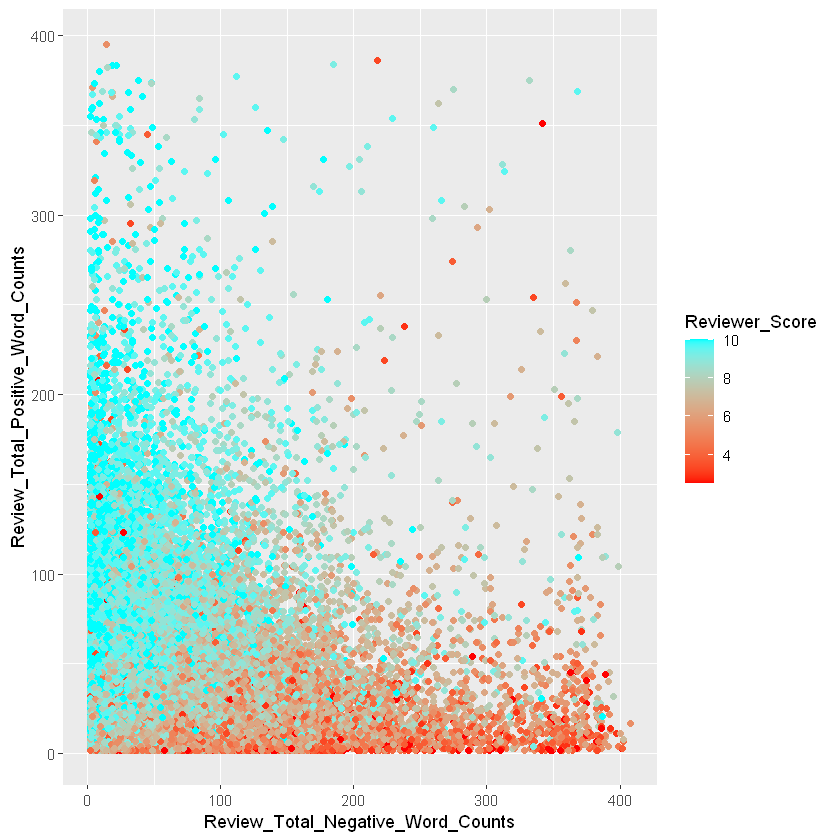

In [41]:
ggplot(df_nlp_words, aes(Review_Total_Negative_Word_Counts, Review_Total_Positive_Word_Counts)) + 
    geom_point(aes(color = Reviewer_Score)) + scale_colour_gradientn(colours=rainbow(2))


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



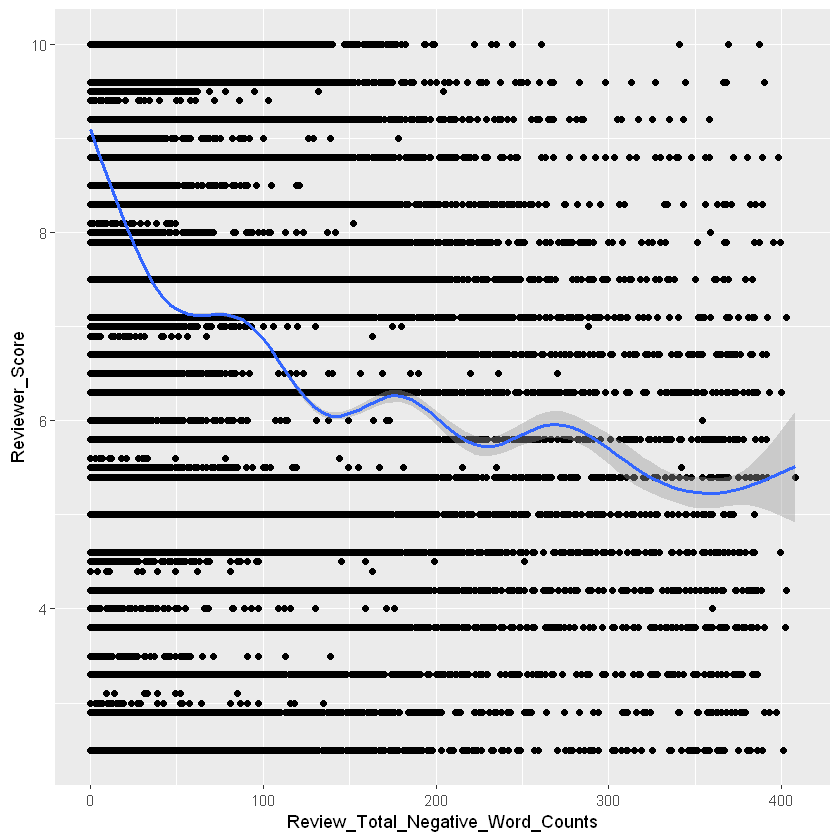

In [42]:
ggplot(dataset_clean, aes(Review_Total_Negative_Word_Counts, Reviewer_Score)) + 
    geom_point( ) + geom_smooth()


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



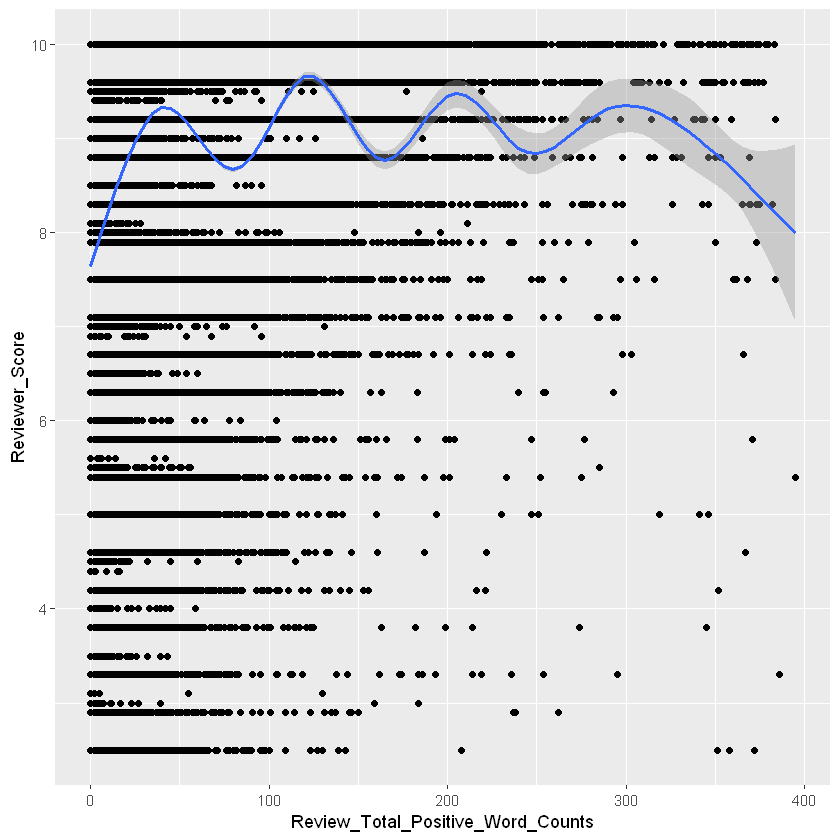

In [43]:
ggplot(dataset_clean, aes(Review_Total_Positive_Word_Counts, Reviewer_Score)) + 
    geom_point( ) + geom_smooth()

In [44]:
df_hotel_performance <- dataset_clean %>%
    select(Hotel_Name, Country, Reviewer_Nationality, Reviewer_Score, Year, Month,Total_Number_of_Reviews,Total_Words) %>%
    group_by(Hotel_Name)


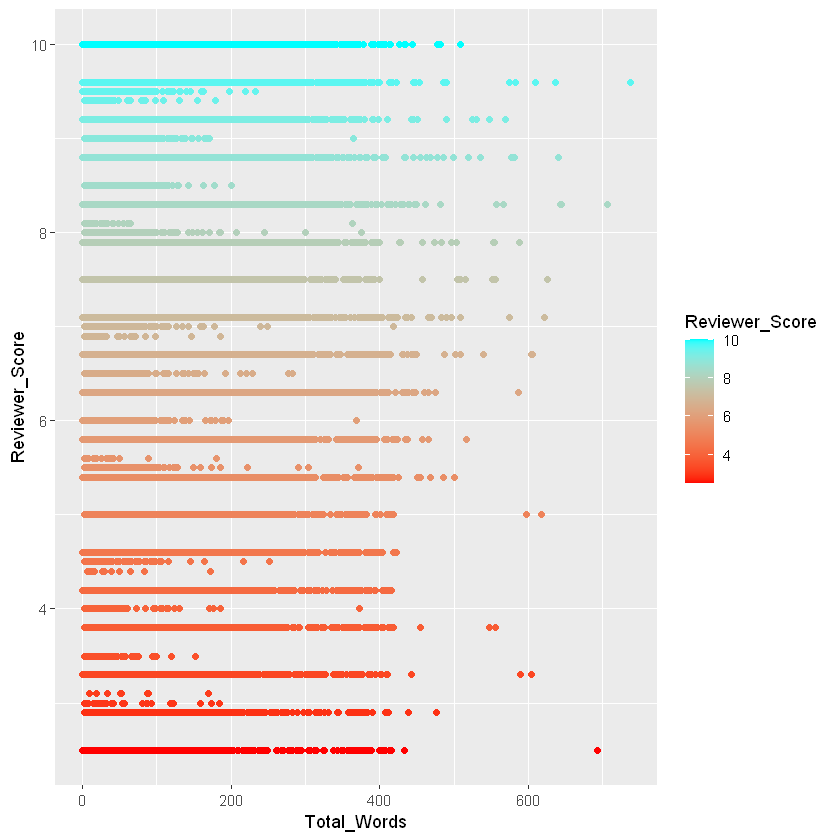

In [45]:
ggplot(df_hotel_performance, aes(Total_Words, Reviewer_Score)) + 
    geom_point(aes(color = Reviewer_Score))+ 
    scale_colour_gradientn(colours=rainbow(2))


In [ ]:
# # subsetting out lengthy columns, keeping hotel address and review data if
# # needed to join
# dataset_nlp <- dataset_clean %>%
#   select(Hotel_Name, Country, Review_Date, Year, Month,
#          Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review, Reviewer_Nationality,
#          Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given, Tags, Reviewer_Score)
# dataset_clean <- dataset_clean %>%
#   select(Hotel_Name, Country, Review_Date, Year, Month, Average_Score,
#          Reviewer_Nationality,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review,
#          Positive_Review)

# write.csv(dataset_clean,"datacleaned.csv", row.names = FALSE)
# print("Our dataset cleaned:" )
# head(dataset_clean)
# print("First column of NLP:" )
# head(dataset_nlp, n = 1)

In [ ]:
dataset_clean <- dataset_clean %>%
  mutate(Reviewer_Nationality = trimws(dataset_clean$Reviewer_Nationality, which = "both"))


## 2- Hotels

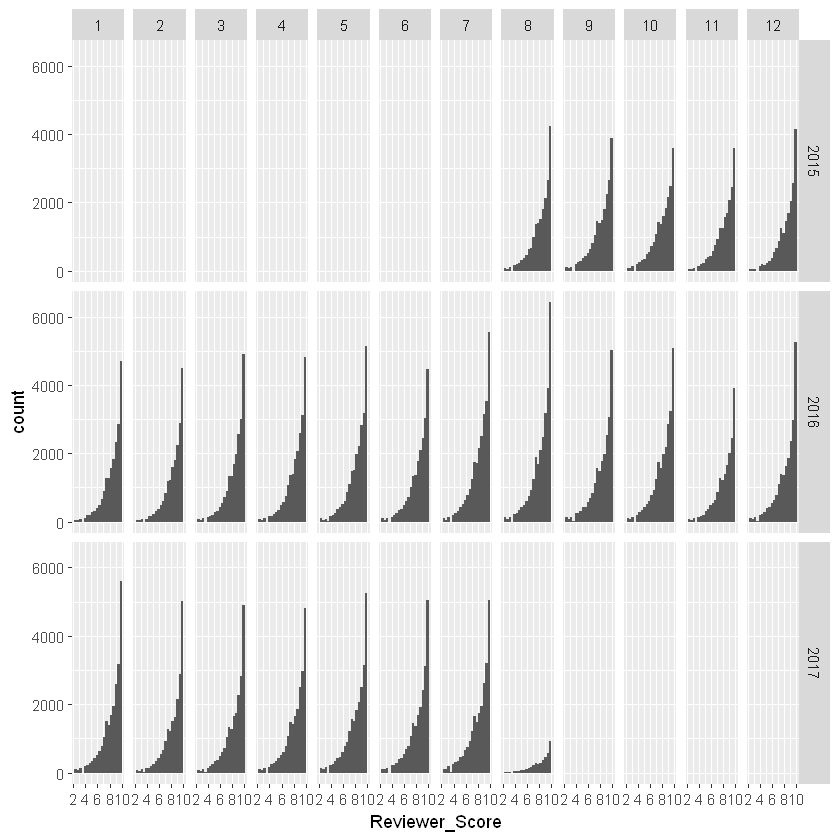

In [46]:
#date non utile car par autant de données dans chaque année
df_eda <- dataset_clean %>%
    select(Hotel_Name, Country, Review_Date, Year, Month, Average_Score,
    Reviewer_Nationality,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given)

ggplot(df_eda, aes(Reviewer_Score)) +
  geom_histogram(bins = 20) + 
  facet_grid(Year~Month)

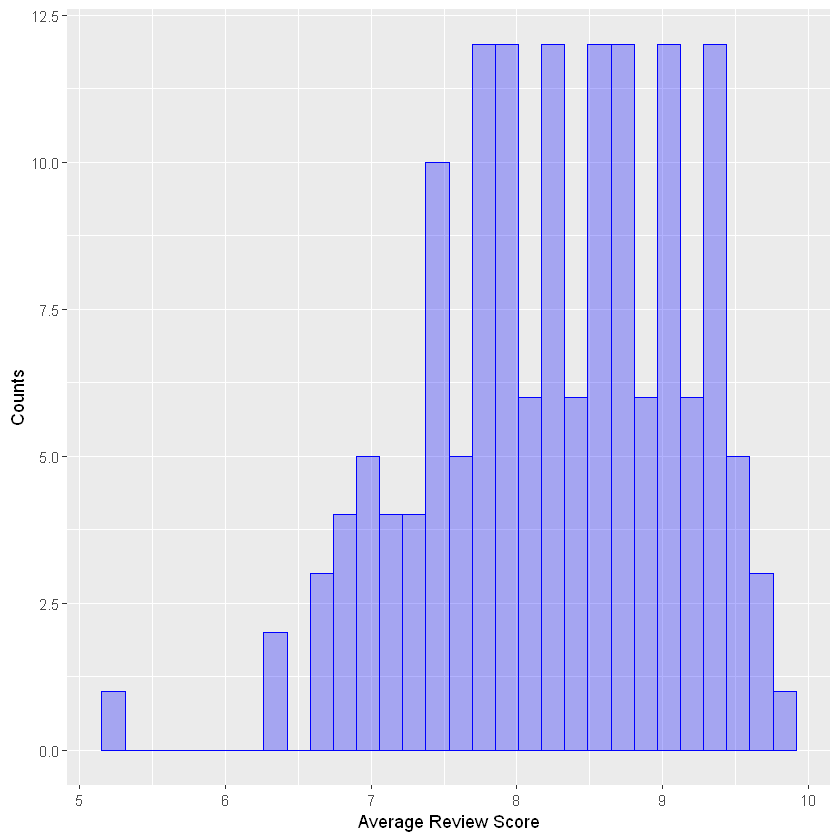

In [47]:
dataset_clean%>%select(Average_Score,Country)%>%distinct(Average_Score,Country)%>%ggplot(aes(x=Average_Score))+geom_histogram(color='blue',fill='blue',alpha=0.3,bins=30)+xlab("Average Review Score")+ylab("Counts")

ERROR: Error in +xlab("Average Review Score"): argument incorrect pour un opérateur unitaire


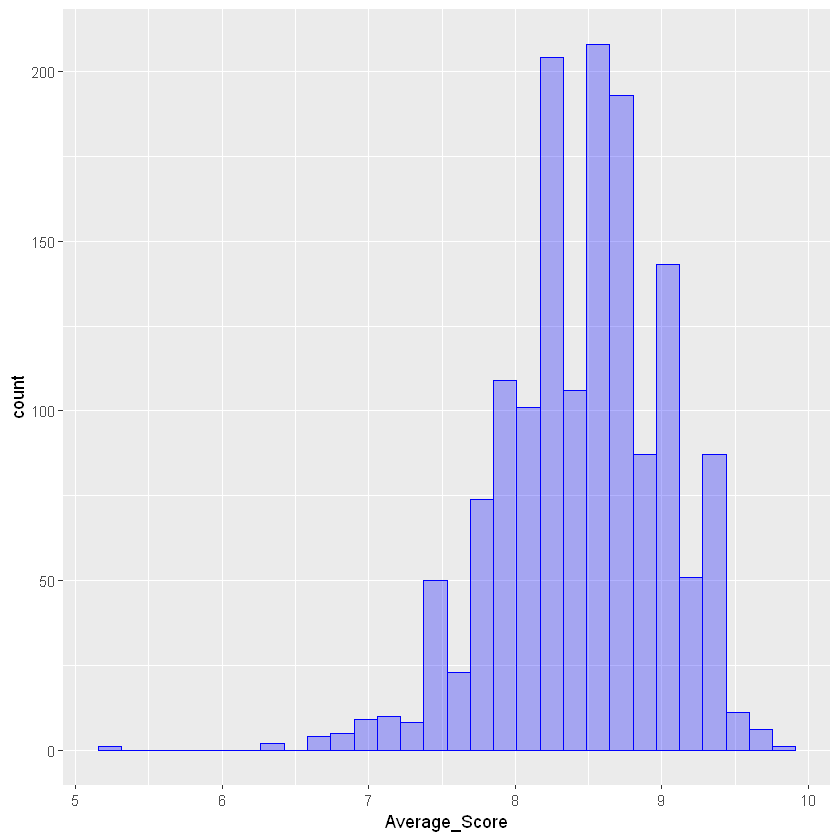

In [54]:
dataset_clean%>%select(Average_Score,Hotel_Name)%>%
    distinct(Average_Score,Hotel_Name)%>%
        ggplot(aes(x=Average_Score)) +geom_histogram(color='blue',fill='blue',alpha=0.3,bins=30)
        +xlab("Average Review Score")
        +ylab("Counts")

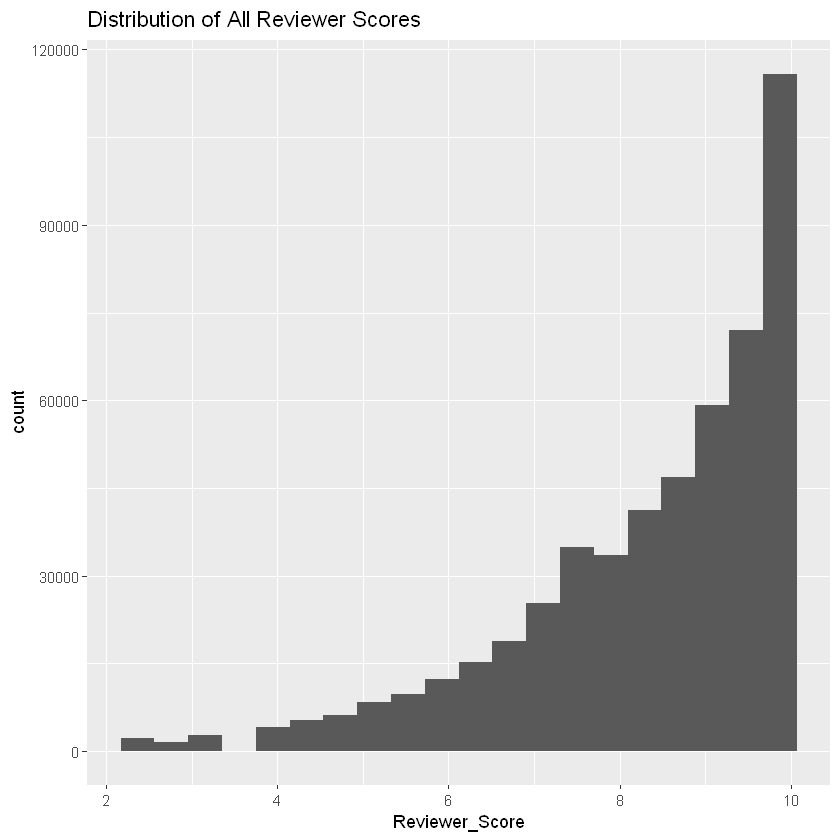

In [56]:
ggplot(dataset_clean, aes(Reviewer_Score))+
  geom_histogram(bins = 20) +
  ggtitle("Distribution of All Reviewer Scores")

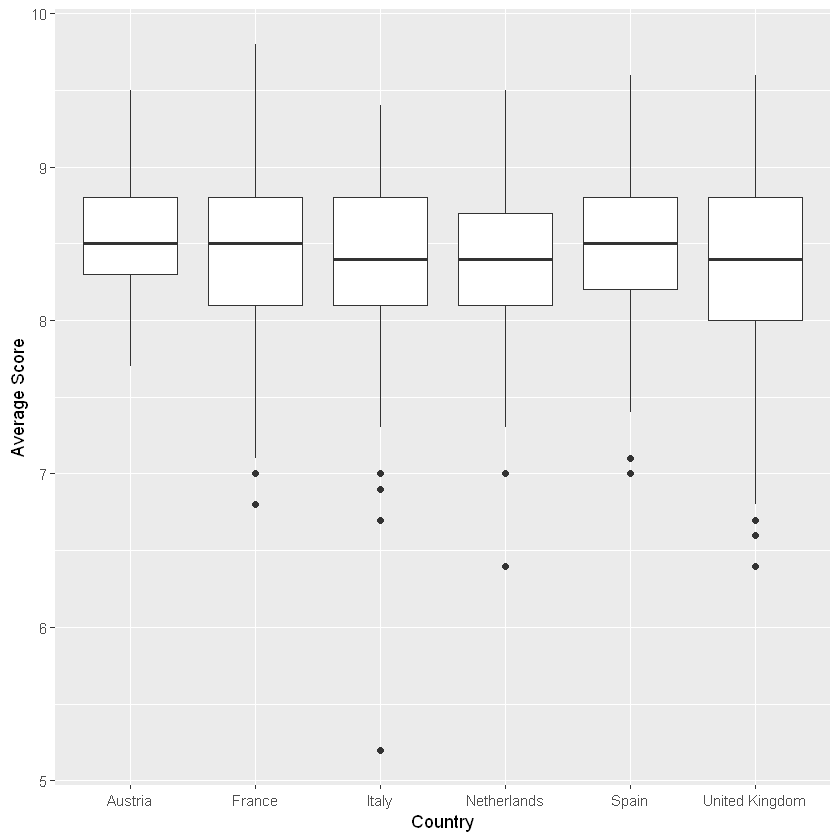

In [51]:
dataset_clean%>%ggplot(aes(x=as.factor(Country),y=Average_Score))+geom_boxplot()+xlab("Country")+ylab("Average Score")

## 3- Review Ranges

In [58]:
p1 <- ggplot(review_range, aes(
    x = Review_Range,
    y = Num_Reviews,
    fill = Review_Range
)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    geom_text(label = review_range$Num_Reviews, nudge_y = 0.5) +
    ggtitle(label = "Number of Reviews by Range of Score") +
    labs(xlab("Review Range"), ylab("Number of Reviews")) +
    theme(legend.position = "off")

g1 <- ggplotGrob(p1)

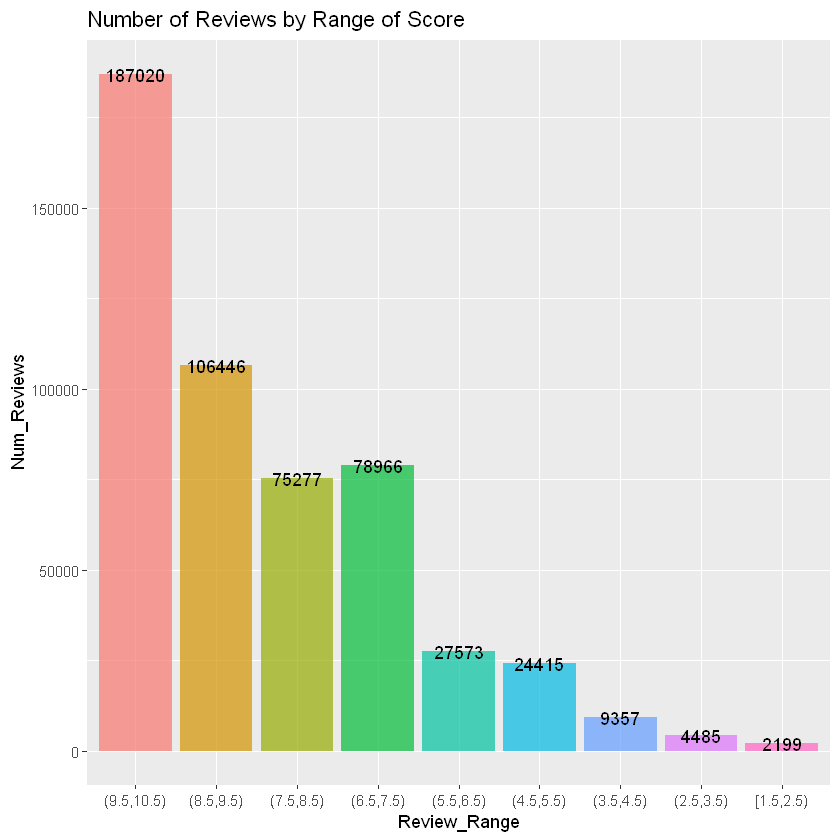

In [59]:
grid.draw(g1)

In [60]:
p2 <- ggplot(review_range, aes(
    x = Review_Range,
    y = Pos_Word_Rate,
    fill = Review_Range
)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    geom_text(label = review_range$Pos_Word_Rate, nudge_y = 0.2) +
    ggtitle(label = "Percent Positive Words by Range of Score") +
    labs(xlab("Review Range"), ylab("Percent(%) Positive Words")) +
    theme(legend.position = "bottom")

g2 <- ggplotGrob(p2)

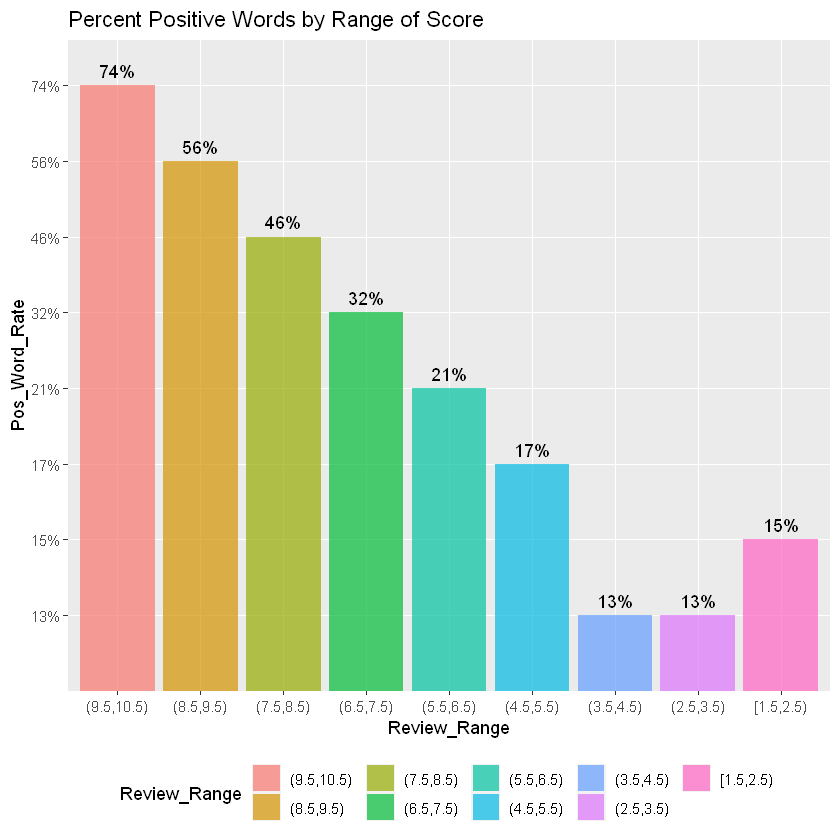

In [61]:
grid.draw(g2)

In [62]:
p3 <- ggplot(review_range, aes(
    x = Review_Range,
    y = Avg_Words_Per_Review,
    fill = Review_Range
)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    geom_text(label = review_range$Avg_Words_Per_Review, nudge_y = 0.2) +
    ggtitle(label = "Average Words per Review by Range of Score") +
    labs(xlab("Review Range"), ylab("Avg. Words per Review")) +
    theme(legend.position = "off")

g3 <- ggplotGrob(p3)


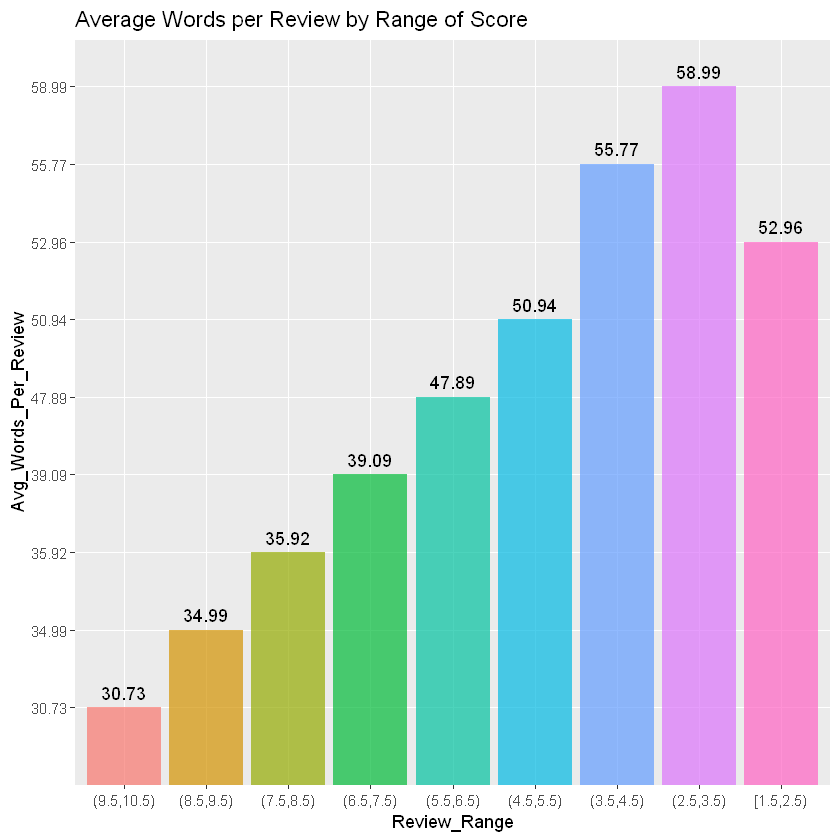

In [64]:
grid.draw(g3)

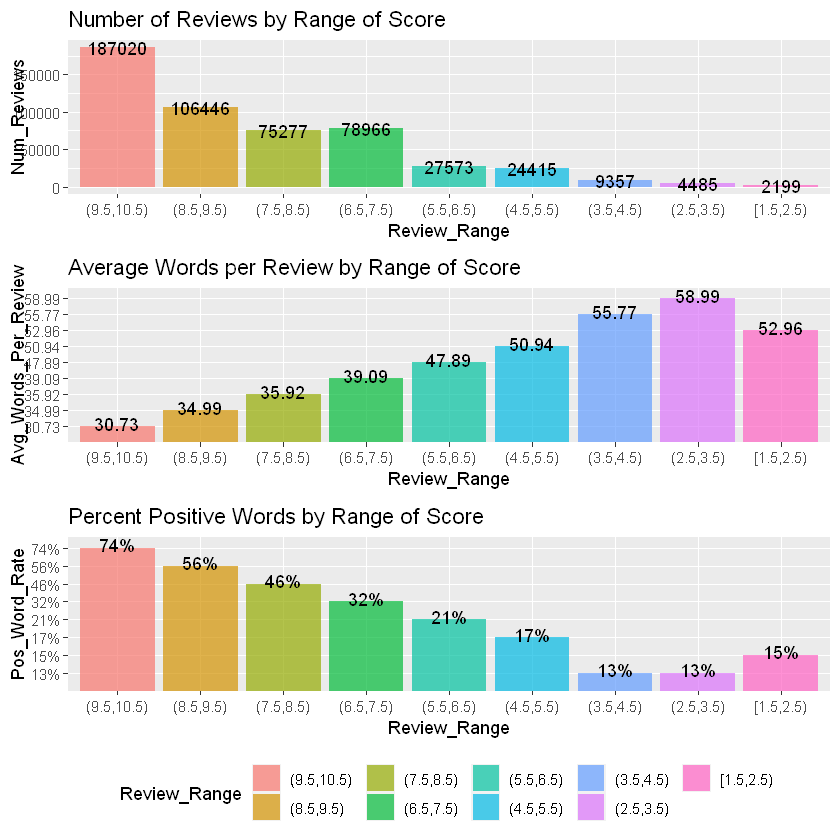

In [65]:
grid.draw(rbind(g1, g3, g2, size = "last"))

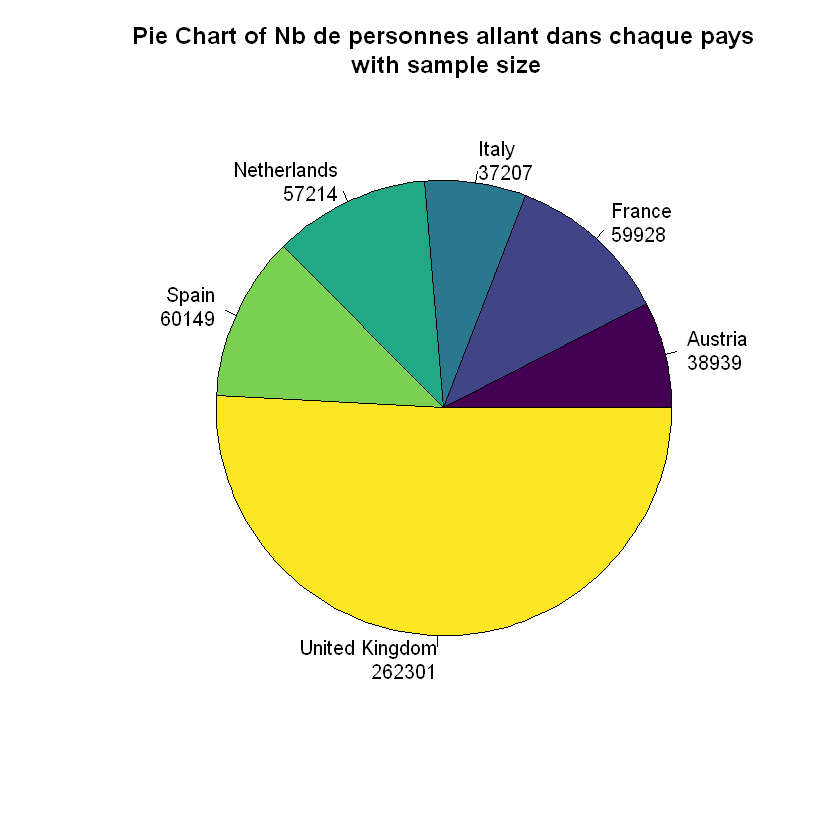

In [67]:
#PIECHART

countryTable <- table(dataset_clean$Country)
pieNames <- paste(countryTable, sep="")
pieLabels <- paste(names(countryTable), "\n", countryTable, sep="")
pie(countryTable, labels = pieLabels, col = viridis(length(countryTable)),
    main="Pie Chart of Nb de personnes allant dans chaque pays\n with sample size")


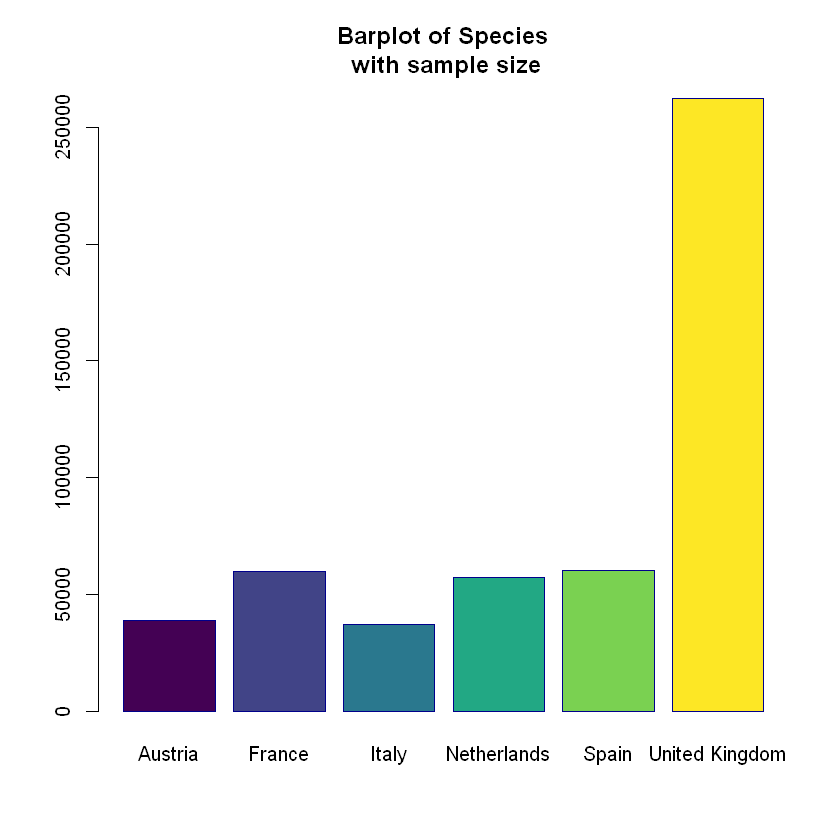

In [68]:
#Barplot 
barplot(countryTable, 
        col = viridis(length(countryTable)),
        border = "dark blue"
        )
title(main = "Barplot of Species\n with sample size")

## 4- Reviewers

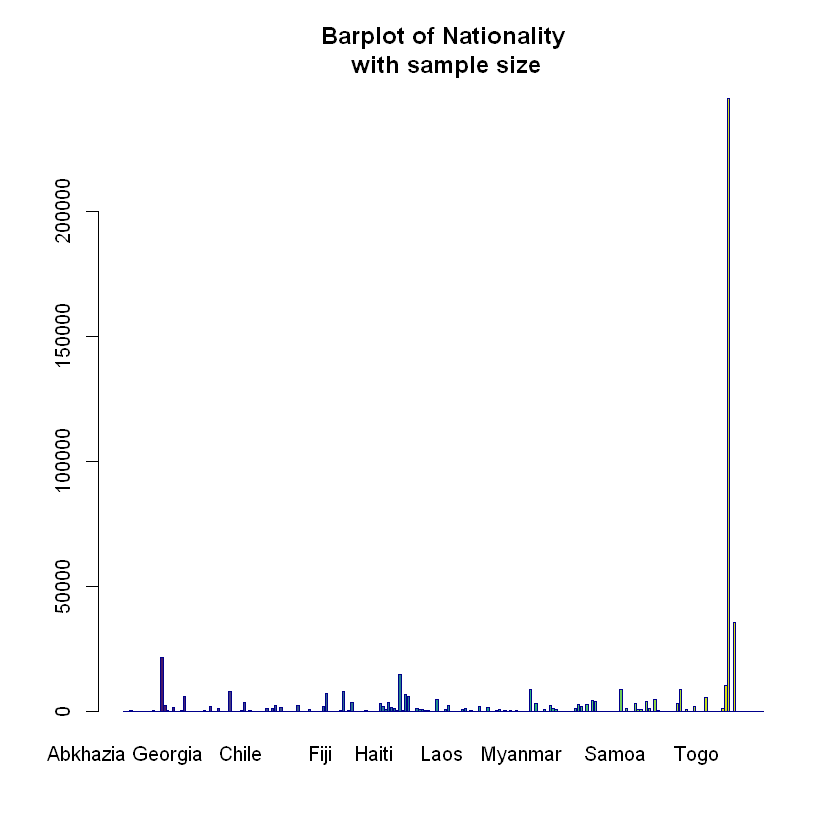

In [72]:
#PIECHART
nationalityTable <- table(dataset$Reviewer_Nationality)
pieNames <- paste(nationalityTable, sep="")
pieLabels <- paste(names(nationalityTable), "\n", nationalityTable, sep="")
#pie(nationalityTable, labels = pieLabels, main="Pie Chart of Nationality\n with sample size")

#Barplot 
barplot(nationalityTable,
        col = viridis(length(nationalityTable)),
        border = "dark blue"
       )
title(main = "Barplot of Nationality\n with sample size")



    No    Yes 
336812 178403 

`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


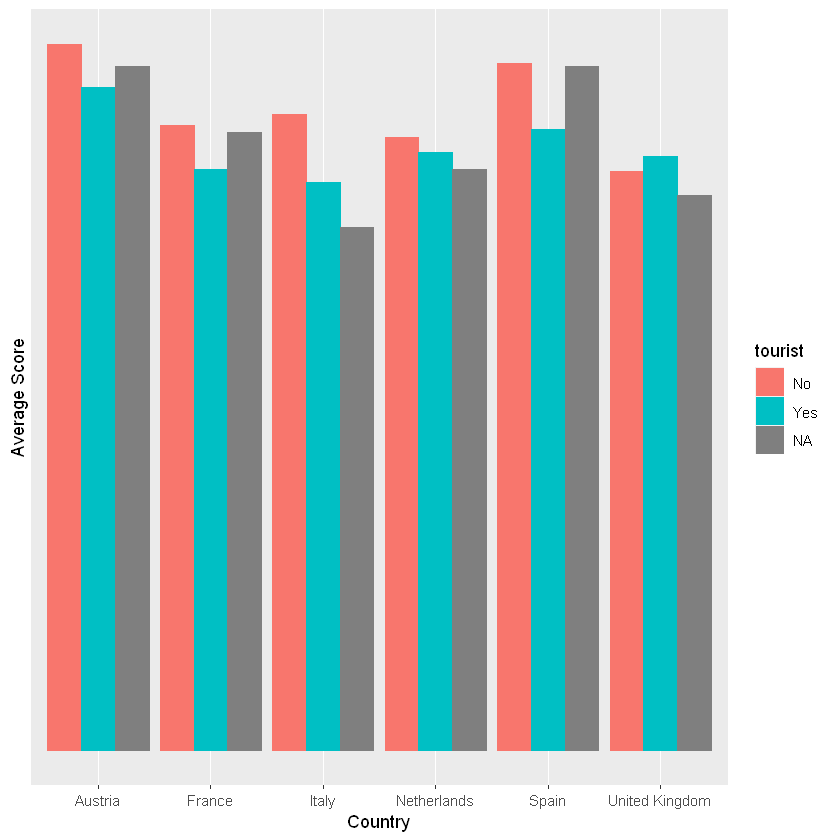

In [73]:
#ind=which(is.na(dataset_clean$Reviewer_Nationality))
#data_model=dataset_clean[-ind,]"""

dataset_clean$tourist=ifelse(dataset_clean$Reviewer_Nationality==dataset_clean$Country,"Yes","No")
dataset_clean$tourist=as.factor(dataset_clean$tourist)
table(dataset_clean$tourist)
dataset_clean%>%group_by(Country,tourist)%>%summarise(average_score=mean(Average_Score))%>%ungroup()%>%mutate(Average_Score=average_score**7)%>%ggplot(aes(x=Country,y=Average_Score,color=tourist,fill=tourist))+geom_bar(stat='identity',position='dodge')+xlab("Country")+ylab("Average Score")+scale_y_continuous(breaks = NULL)



    No    Yes 
336812 178403 

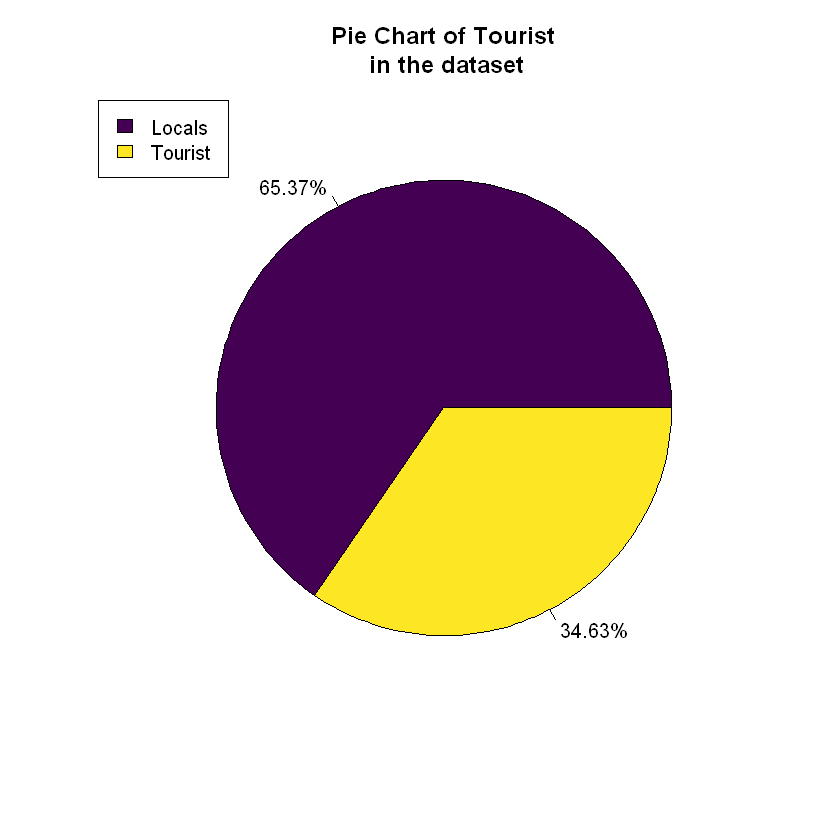

In [74]:
touristTable <- table(dataset_clean$tourist)
touristTable
#pieNames <- paste(touristTable, sep="")
pieLabels <- paste0(round(100 * touristTable/sum(touristTable), 2), "%")
pie(touristTable, labels = pieLabels, col = viridis(length(touristTable)),
    main="Pie Chart of Tourist\n in the dataset")

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(touristTable)))

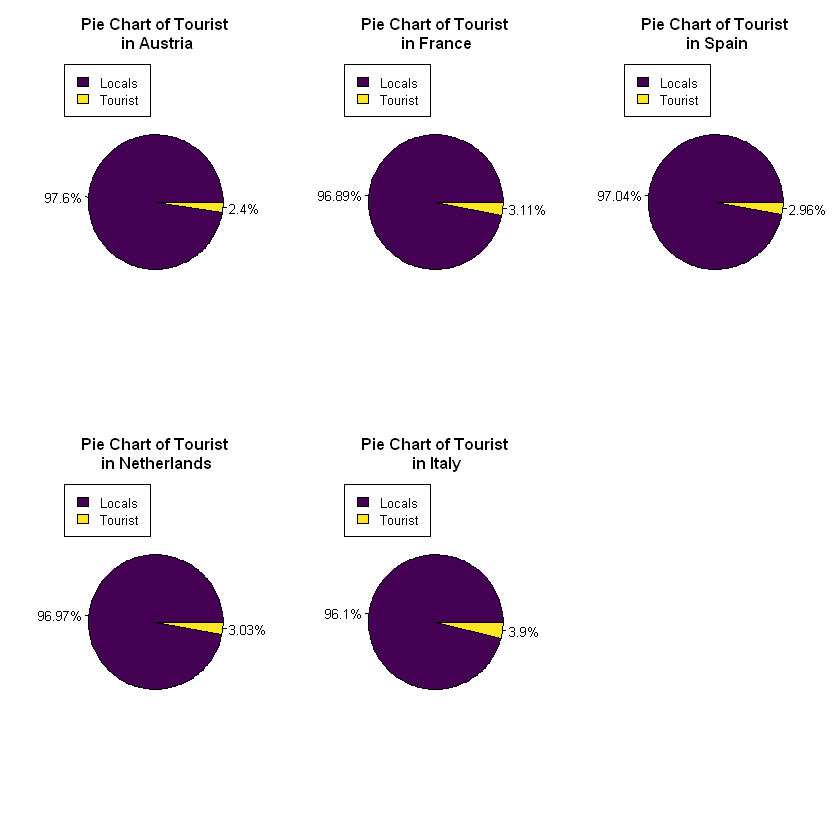

In [76]:
par(mfrow=c(2,3))


atTable <- table(((dataset_clean%>%filter(Country=='Austria'))$tourist))
pieLabels <- paste0(round(100 * atTable/sum(atTable), 2), "%")
pie(atTable, labels = pieLabels, col = viridis(length(atTable)),
    main="Pie Chart of Tourist\n in Austria") -> at

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(atTable)))


frTable <- table(((dataset_clean%>%filter(Country=='France'))$tourist))
pieLabels <- paste0(round(100 * frTable/sum(frTable), 2), "%")
pie(frTable, labels = pieLabels, col = viridis(length(atTable)),
    main="Pie Chart of Tourist\n in France") -> fr

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(atTable)))


spTable <- table(((dataset_clean%>%filter(Country=='Spain'))$tourist))
pieLabels <- paste0(round(100 * spTable/sum(spTable), 2), "%")
pie(spTable, labels = pieLabels, col = viridis(length(atTable)),
    main="Pie Chart of Tourist\n in Spain")

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(atTable)))

nTable <- table(((dataset_clean%>%filter(Country=='Netherlands'))$tourist))
pieLabels <- paste0(round(100 * nTable/sum(nTable), 2), "%")
pie(nTable, labels = pieLabels, col = viridis(length(atTable)),
    main="Pie Chart of Tourist\n in Netherlands")

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(atTable)))


itTable <- table(((dataset_clean%>%filter(Country=='Italy'))$tourist))
pieLabels <- paste0(round(100 * itTable/sum(itTable), 2), "%")
pie(itTable, labels = pieLabels, col = viridis(length(atTable)),
    main="Pie Chart of Tourist\n in Italy")

legend("topleft", legend = c("Locals", "Tourist"),
       fill =  viridis(length(atTable)))


#grid.arrange(at,fr,ncol=2)

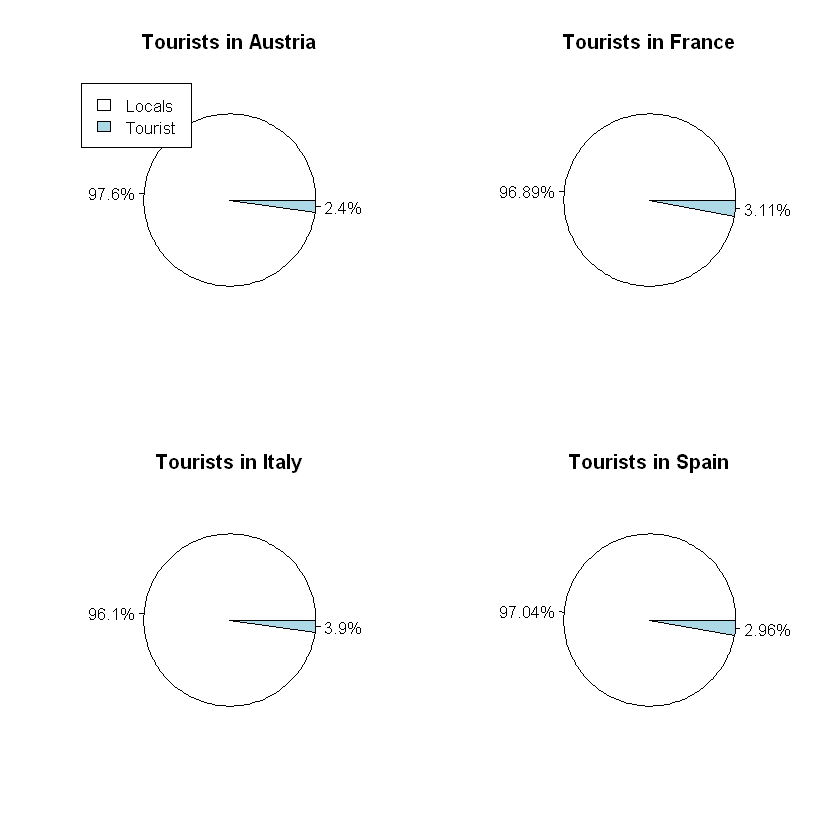

In [77]:
# set the plotting area into a 1*2 array
par(mfrow=c(2,2))

# Draw the two pie chart using above datasets
pie(atTable, paste0(round(100 * atTable/sum(atTable), 2), "%"),main="Tourists in Austria")
legend("topleft", legend = c("Locals", "Tourist"),
       fill =  c("white", "lightblue"))

pie(frTable, paste0(round(100 * frTable/sum(frTable), 2), "%"),main="Tourists in France")
pie(atTable, paste0(round(100 * itTable/sum(itTable), 2), "%"),main="Tourists in Italy")
pie(spTable, paste0(round(100 * spTable/sum(spTable), 2), "%"),main="Tourists in Spain")



## Linear Regression

### Linear Regression Using Reviewer Nationality, Country, Review Word Counts (Positive and Negative)

In [81]:
gradereg<-lm(Reviewer_Score ~ Reviewer_Nationality + Country + Review_Total_Positive_Word_Counts + Review_Total_Negative_Word_Counts, data=dataset_clean)


In [ ]:
### Regression output
summary(gradereg)

### Extraction des coefficients
coef(gradereg)

### Intervalle de confiance (à 95%) des coefficients
confint(gradereg)

### Extraction des valeurs prédites
fitted(gradereg)

### Extraction des résidus
resid(gradereg)

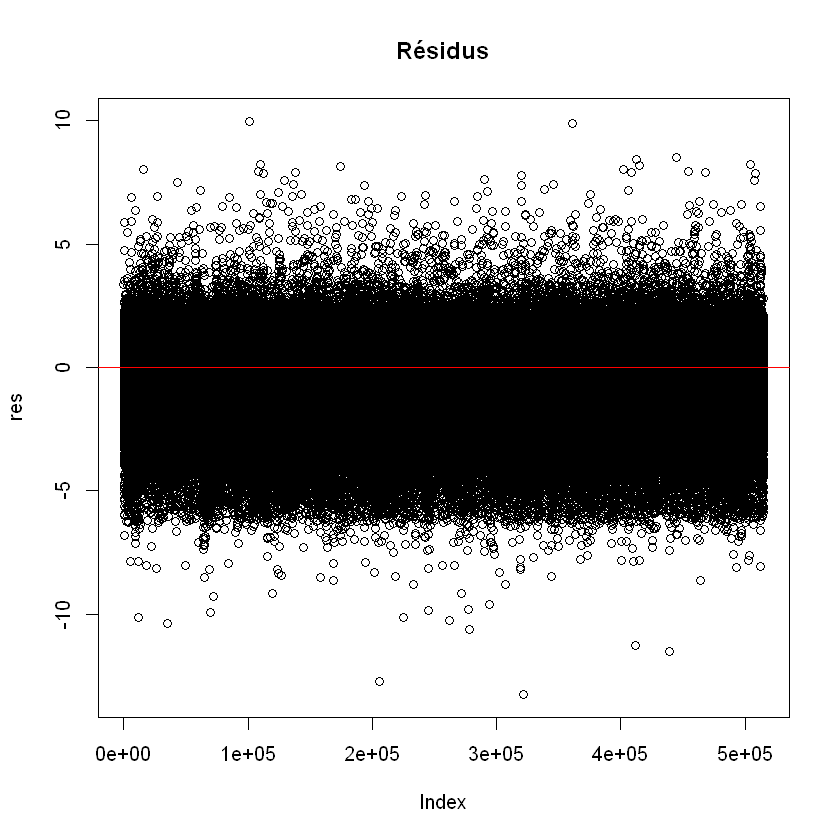

In [82]:
#### résidus
res<-resid(gradereg)
plot(res,main="Résidus")
abline(h=0,col="red")

### Linear Regression Using only Country

In [86]:
gradereg.country <-lm(Reviewer_Score ~ Reviewer_Nationality + Country, data=dataset_clean)

In [ ]:
summary(gradereg.country)
coef(gradereg.country)
confint(gradereg.country)
fitted(gradereg.country)
resid(gradereg.country)

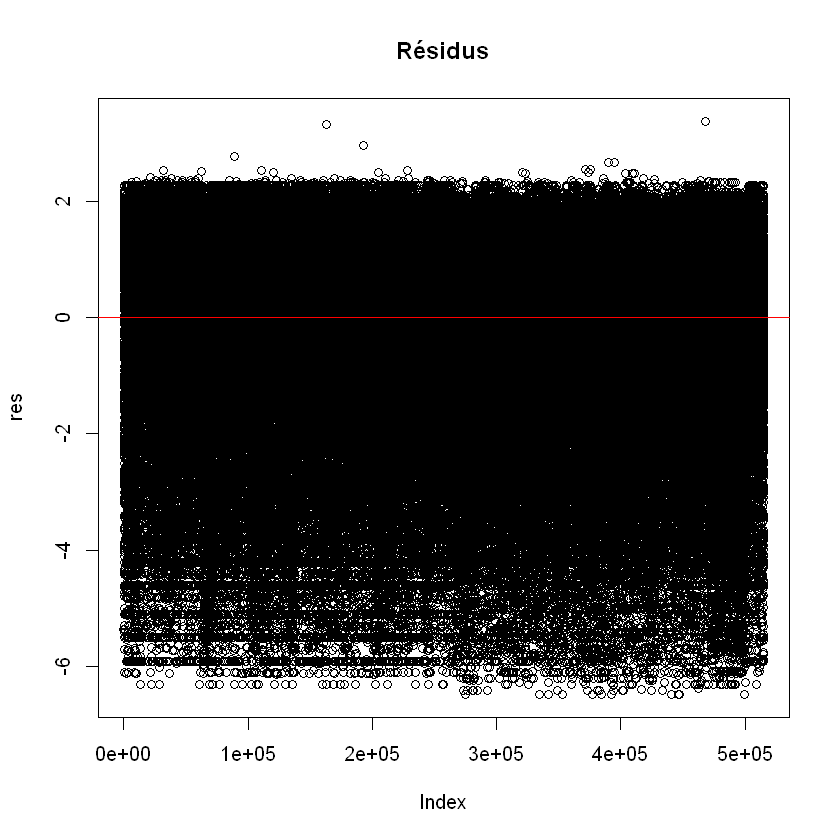

In [87]:
res<-resid(gradereg.country)
plot(res,main="Résidus")
abline(h=0,col="red")


### Linear Regression using only word counts

In [89]:
gradereg.word_count <-lm(Reviewer_Score ~ Review_Total_Positive_Word_Counts + Review_Total_Negative_Word_Counts, data=dataset_clean)


In [ ]:
summary(gradereg.word_count)
coef(gradereg.word_count)
confint(gradereg.word_count)
fitted(gradereg.word_count)
resid(gradereg.word_count)


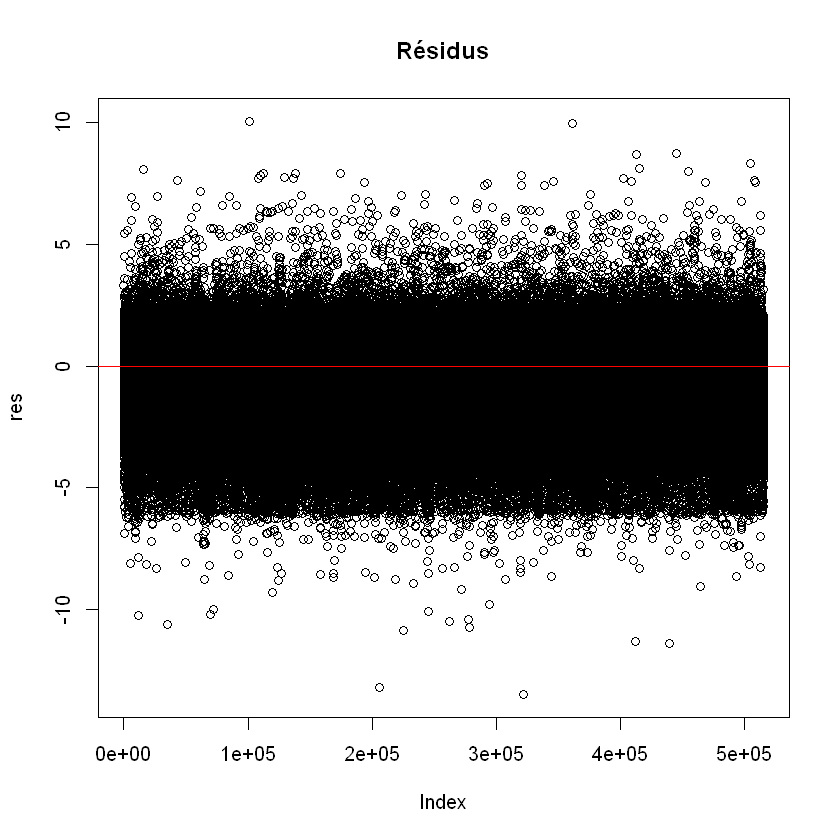

In [90]:
res<-resid(gradereg.word_count)
plot(res,main="Résidus")
abline(h=0,col="red")


## Colinearity comparision

In [ ]:
check_collinearity(gradereg)


,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Reviewer_Nationality,1.319523,1.148705
2,Country,1.307715,1.143554
3,Review_Total_Positive_Word_Counts,1.030804,1.015285
4,Review_Total_Negative_Word_Counts,1.018486,1.009201


In [88]:
check_collinearity(gradereg.country)

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Reviewer_Nationality,1.300674,1.140471
2,Country,1.300674,1.140471


In [91]:
check_collinearity(gradereg.word_count)

,Term,VIF,SE_factor
,<chr>,<dbl>,<dbl>
1,Review_Total_Positive_Word_Counts,1.014515,1.007231
2,Review_Total_Negative_Word_Counts,1.014515,1.007231
